In [1]:
import pandas as pd
import numpy as np
import os #Interacts with the operating system, e.g. paths, mkdir
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Allows ploting in a 3D graph

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report



In [2]:
file_path = './PowerPlantsintheU_Export_TableToExcel.xlsx'
df = pd.read_excel(file_path)

In [3]:
df.head().iloc[:,10:30]

,State,Zip,PrimSource,source_des,tech_desc,Install_MW,Total_MW,Bat_MW,Bio_MW,Coal_MW,Geo_MW,Hydro_MW,HydroPS_MW,NG_MW,Nuclear_MW,Crude_MW,Solar_MW,Wind_MW,Other_MW,Source
0,Wisconsin,54452,hydroelectric,Hydroelectric = 2.3 MW,Conventional Hydroelectric,2.3,2.3,0.0,0.0,0.0,0.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"
1,Wisconsin,54143,hydroelectric,Hydroelectric = 1.3 MW,Conventional Hydroelectric,1.3,1.3,0.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"
2,Wisconsin,54303,natural gas,Natural Gas = 79 MW,Natural Gas Fired Combustion Turbine,91.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,79.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"
3,Wisconsin,54114,hydroelectric,Hydroelectric = 3.8 MW,Conventional Hydroelectric,3.8,3.8,0.0,0.0,0.0,0.0,3.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"
4,Wisconsin,54487,hydroelectric,Hydroelectric = 2.6 MW,Conventional Hydroelectric,2.6,2.6,0.0,0.0,0.0,0.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923"


In [4]:
df.nunique()

OBJECTID_1    12008
OBJECTID      12008
Plant_Code    12008
Plant_Name    11985
Utility_ID     5123
Utility_Na     5109
sector_nam        7
Street_Add    11193
City           4871
County         1441
State            52
Zip            6637
PrimSource       12
source_des     3952
tech_desc       154
Install_MW     2163
Total_MW       2044
Bat_MW          114
Bio_MW          247
Coal_MW         220
Geo_MW           58
Hydro_MW        492
HydroPS_MW       41
NG_MW          1122
Nuclear_MW       55
Crude_MW        334
Solar_MW        393
Wind_MW         593
Other_MW         79
Source            1
Period            1
Longitude     11726
Latitude      11657
dtype: int64

In [5]:
df_outlier = df[df['Install_MW']>5000].copy() # save the outlier in a df
df.drop(df_outlier.index,inplace = True) # drop the outlier from the original df

In [6]:
# Calculate the total of production of energy by State
df_powerByState = df.groupby('State')[['Install_MW','Total_MW']].sum().reset_index()
# Rename columns 
df_powerByState.rename(columns={'Install_MW':'Install_MW_State','Total_MW':'Total_MW_State'},inplace=True)
# Merge the total with the df
df = pd.merge(df,df_powerByState, on = 'State')

In [7]:
# Select columns to analyze
Scolumns = ['sector_nam','PrimSource','Install_MW','Total_MW','Install_MW_State','Total_MW_State','Longitude','Latitude']
df[Scolumns]

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,-89.685000,45.178600
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,-87.758600,45.113600
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,-88.008600,44.540000
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,-88.067800,45.233300
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,-89.730600,45.441100
...,...,...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0,-67.109007,18.485901
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,-66.285500,18.260400
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,-65.963100,18.373600
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0,-66.722048,18.470243


C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

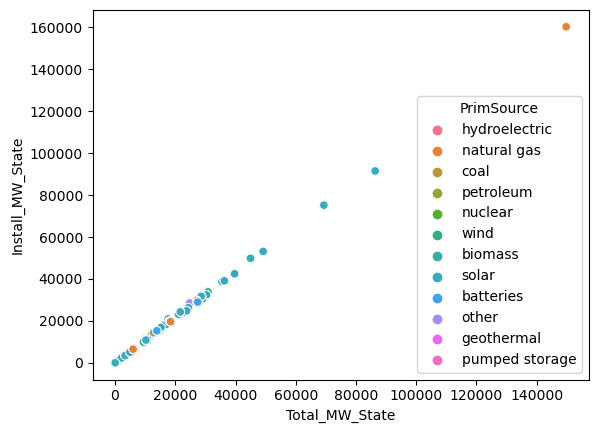

In [8]:
sns.scatterplot(data = df, x = df.Total_MW_State, y = df.Install_MW_State, hue = 'PrimSource')

plt.show()

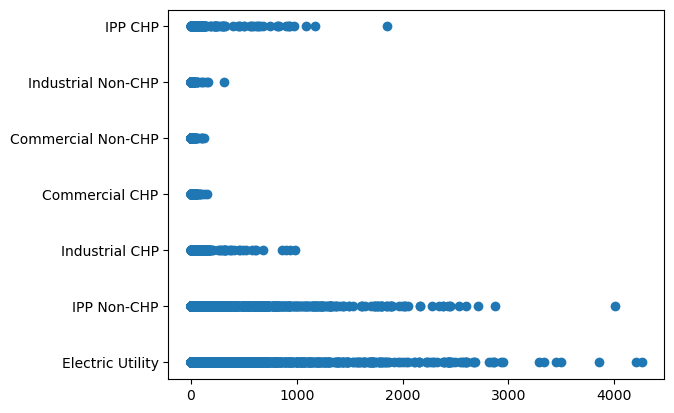

In [9]:


plt.scatter(df.Install_MW,df.sector_nam)

plt.show()

In [10]:
# sns.scatterplot(df, df.)

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

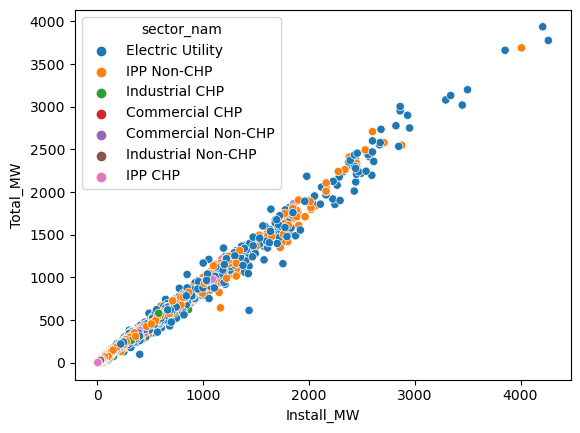

In [11]:

sns.scatterplot(data = df, x = df.Install_MW, y = df.Total_MW,hue='sector_nam')


# plt.xlabel('Birth Rate')
# plt.ylabel('Unemployment rate(%)')
# plt.title('Scatterplot of Birth Rate vs Unemployment rate(%)')


plt.show()

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

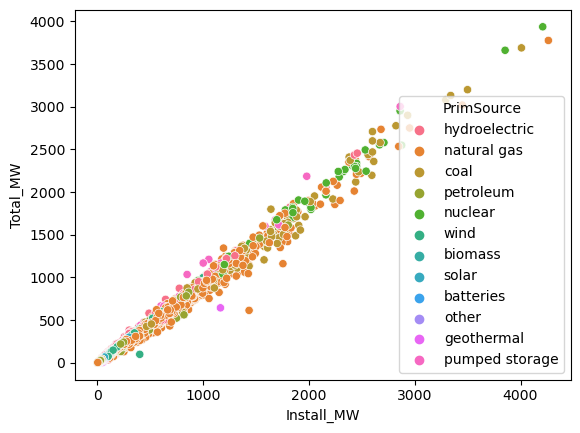

In [12]:

sns.scatterplot(data = df, x = df.Install_MW, y = df.Total_MW,hue='PrimSource')


# plt.xlabel('Birth Rate')
# plt.ylabel('Unemployment rate(%)')
# plt.title('Scatterplot of Birth Rate vs Unemployment rate(%)')


plt.show()

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='sector_nam', ylabel='Install_MW'>

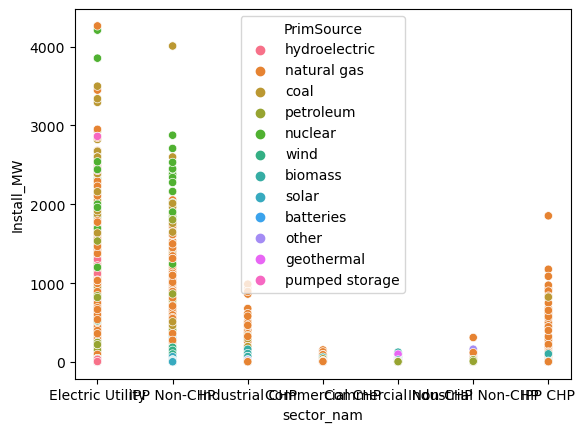

In [13]:
sns.scatterplot(data=df, x = df.sector_nam, y = df.Install_MW, hue = 'PrimSource')

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='PrimSource', ylabel='Total_MW'>

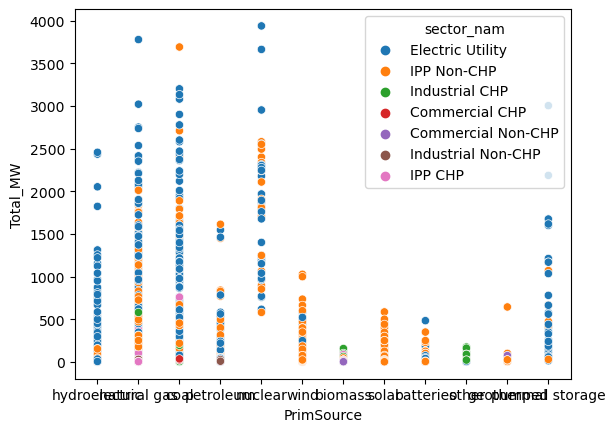

In [14]:
sns.scatterplot(data = df, x = df.PrimSource, y = df.Total_MW, hue = df.sector_nam)

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

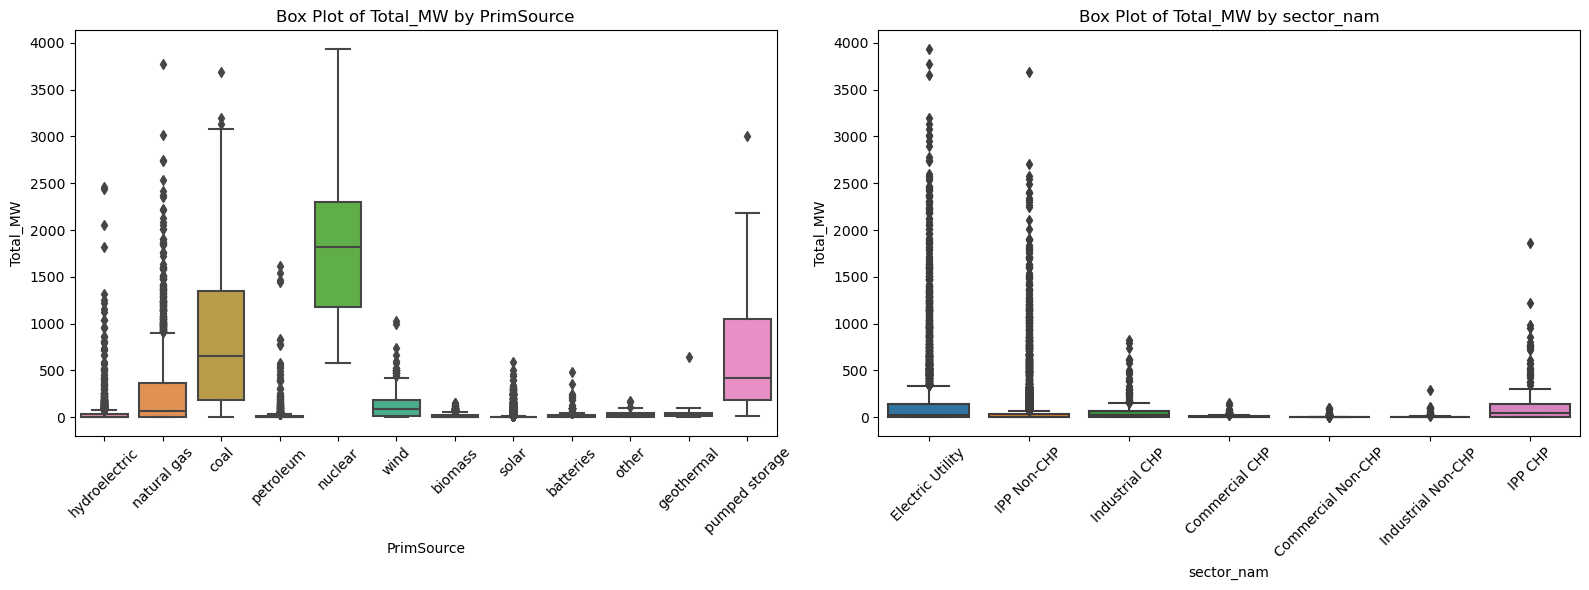

In [15]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot without 'sector_nam' as hue
sns.boxplot(data=df, x='PrimSource', y='Total_MW', ax=axes[0])
axes[0].set_title('Box Plot of Total_MW by PrimSource')
axes[0].set_xlabel('PrimSource')
axes[0].set_ylabel('Total_MW')

# Rotate x-axis labels in the left subplot
axes[0].tick_params(axis='x', rotation=45)

# Box plot with 'sector_nam' as x-axis
sns.boxplot(data=df, x='sector_nam', y='Total_MW', ax=axes[1])
axes[1].set_title('Box Plot of Total_MW by sector_nam')
axes[1].set_xlabel('sector_nam')
axes[1].set_ylabel('Total_MW')

# Rotate x-axis labels in the right subplot
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [16]:
df_KMeans = df[Scolumns].copy()

label_encoder = LabelEncoder()

df_KMeans['Sector_encoded'] = label_encoder.fit_transform(df_KMeans.sector_nam)
df_KMeans['PimSource_encoded'] = label_encoder.fit_transform(df_KMeans.PrimSource)

df_KMeans#.nunique()



,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude,Sector_encoded,PimSource_encoded
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,-89.685000,45.178600,2,4
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,-87.758600,45.113600,2,4
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,-88.008600,44.540000,2,5
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,-88.067800,45.233300,2,4
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,-89.730600,45.441100,2,4
...,...,...,...,...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0,-67.109007,18.485901,0,5
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,-66.285500,18.260400,1,8
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,-65.963100,18.373600,6,8
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0,-66.722048,18.470243,6,8


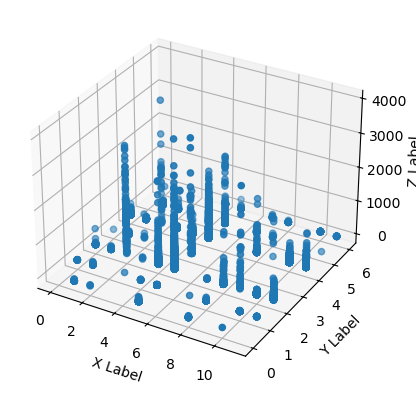

In [17]:
# Create a new figure with 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data in 3D
ax.scatter(df_KMeans.PimSource_encoded, df_KMeans.Sector_encoded, df.Total_MW)

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df_KMeans[['Install_MW','Total_MW','Total_MW_State','Sector_encoded','PimSource_encoded','Longitude','Latitude']])

df_KMeans[['SInstall_MW','STotal_MW','STotal_MW_State','SSector_encoded','SPimSource_encoded','SLongitude','SLatitude']] = scaler.transform(df_KMeans[['Install_MW','Total_MW','Total_MW_State','Sector_encoded','PimSource_encoded','Longitude','Latitude']])

df_KMeans.head()
# StandardScaler().fit_transform(df_KMeans[['Install_MW','Total_MW','Total_MW_State','Sector_encoded','PimSource_encoded']])

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,-89.6850,45.1786,2,4,0.000469,0.000584,0.111472,0.333333,0.363636,0.770696,0.510480
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,-87.7586,45.1136,2,4,0.000235,0.000330,0.111472,0.333333,0.363636,0.788796,0.509261
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,-88.0086,44.5400,2,5,0.021278,0.020066,0.111472,0.333333,0.454545,0.786447,0.498509
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,-88.0678,45.2333,2,4,0.000821,0.000965,0.111472,0.333333,0.363636,0.785891,0.511505
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,-89.7306,45.4411,2,4,0.000540,0.000660,0.111472,0.333333,0.363636,0.770268,0.515401


In [19]:

# df_KMeans[['SInstall_MW','STotal_MW','STotal_MW_State','SSector_encoded','SPimSource_encoded','SLongitude','SLatitude']] = StandardScaler().fit_transform(df_KMeans[['Install_MW','Total_MW','Total_MW_State','Sector_encoded','PimSource_encoded','Longitude','Latitude']])
# df_KMeans
encoded_columns = ['SInstall_MW','STotal_MW','STotal_MW_State','SSector_encoded','SPimSource_encoded','SLongitude','SLatitude']
df_KMeans[encoded_columns]

,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude
0,0.000469,0.000584,0.111472,0.333333,0.363636,0.770696,0.510480
1,0.000235,0.000330,0.111472,0.333333,0.363636,0.788796,0.509261
2,0.021278,0.020066,0.111472,0.333333,0.454545,0.786447,0.498509
3,0.000821,0.000965,0.111472,0.333333,0.363636,0.785891,0.511505
4,0.000540,0.000660,0.111472,0.333333,0.363636,0.770268,0.515401
...,...,...,...,...,...,...,...
12002,0.001337,0.001524,0.039603,0.000000,0.454545,0.982811,0.010100
12003,0.000821,0.000610,0.039603,0.166667,0.727273,0.990549,0.005873
12004,0.006404,0.007010,0.039603,1.000000,0.727273,0.993578,0.007995
12005,0.001853,0.002083,0.039603,1.000000,0.727273,0.986447,0.009807


In [20]:
df_KMeans.iloc[:,8:]
# km.fit_predict(df_KMeans.iloc[:,2:].values)


,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude
0,2,4,0.000469,0.000584,0.111472,0.333333,0.363636,0.770696,0.510480
1,2,4,0.000235,0.000330,0.111472,0.333333,0.363636,0.788796,0.509261
2,2,5,0.021278,0.020066,0.111472,0.333333,0.454545,0.786447,0.498509
3,2,4,0.000821,0.000965,0.111472,0.333333,0.363636,0.785891,0.511505
4,2,4,0.000540,0.000660,0.111472,0.333333,0.363636,0.770268,0.515401
...,...,...,...,...,...,...,...,...,...
12002,0,5,0.001337,0.001524,0.039603,0.000000,0.454545,0.982811,0.010100
12003,1,8,0.000821,0.000610,0.039603,0.166667,0.727273,0.990549,0.005873
12004,6,8,0.006404,0.007010,0.039603,1.000000,0.727273,0.993578,0.007995
12005,6,8,0.001853,0.002083,0.039603,1.000000,0.727273,0.986447,0.009807


In [21]:
km = KMeans(n_clusters=3, random_state=42)
y_predicted = km.fit_predict(df_KMeans[encoded_columns])
df_KMeans['Cluster'] = y_predicted

In [22]:
df_KMeans

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude,Cluster
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,-89.685000,45.178600,2,4,0.000469,0.000584,0.111472,0.333333,0.363636,0.770696,0.510480,0
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,-87.758600,45.113600,2,4,0.000235,0.000330,0.111472,0.333333,0.363636,0.788796,0.509261,0
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,-88.008600,44.540000,2,5,0.021278,0.020066,0.111472,0.333333,0.454545,0.786447,0.498509,0
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,-88.067800,45.233300,2,4,0.000821,0.000965,0.111472,0.333333,0.363636,0.785891,0.511505,0
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,-89.730600,45.441100,2,4,0.000540,0.000660,0.111472,0.333333,0.363636,0.770268,0.515401,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0,-67.109007,18.485901,0,5,0.001337,0.001524,0.039603,0.000000,0.454545,0.982811,0.010100,0
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,-66.285500,18.260400,1,8,0.000821,0.000610,0.039603,0.166667,0.727273,0.990549,0.005873,1
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,-65.963100,18.373600,6,8,0.006404,0.007010,0.039603,1.000000,0.727273,0.993578,0.007995,1
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0,-66.722048,18.470243,6,8,0.001853,0.002083,0.039603,1.000000,0.727273,0.986447,0.009807,1


C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Total_MW', ylabel='Install_MW'>

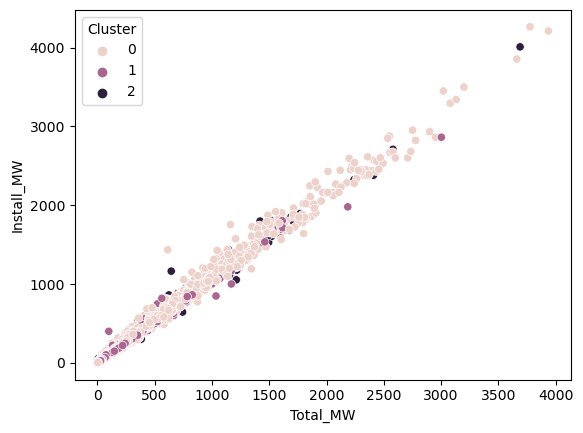

In [23]:

sns.scatterplot(data = df_KMeans, x=df_KMeans.Total_MW, y=df_KMeans.Install_MW, hue = 'Cluster')

In [24]:
# df0 = df_KMeans[df_KMeans['Cluster']==0]
# sns.scatterplot(data = df1, x=df1.Total_MW, y=df1.Install_MW, hue = 'Cluster')

In [25]:
df_KMeans.iloc[:,8:13]

,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State
0,2,4,0.000469,0.000584,0.111472
1,2,4,0.000235,0.000330,0.111472
2,2,5,0.021278,0.020066,0.111472
3,2,4,0.000821,0.000965,0.111472
4,2,4,0.000540,0.000660,0.111472
...,...,...,...,...,...
12002,0,5,0.001337,0.001524,0.039603
12003,1,8,0.000821,0.000610,0.039603
12004,6,8,0.006404,0.007010,0.039603
12005,6,8,0.001853,0.002083,0.039603


In [26]:
wcss = []

for k in range(1,11):
    km = KMeans(n_clusters=k)
    km.fit(df_KMeans[encoded_columns])
    wcss.append(km.inertia_)
    


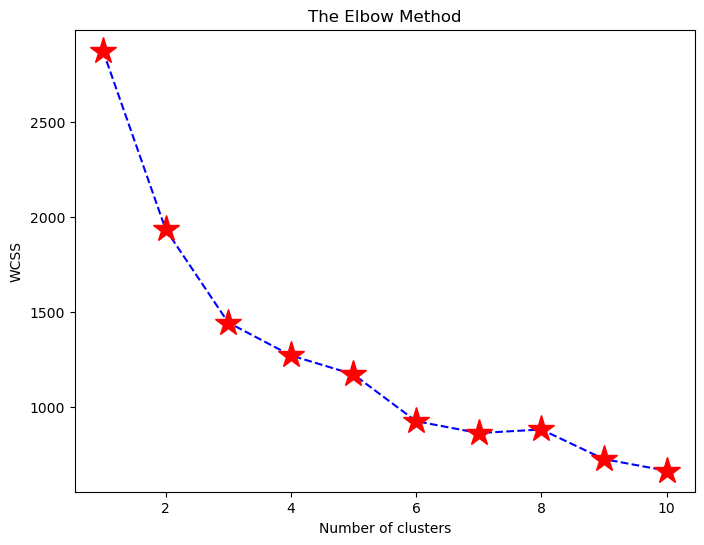

In [27]:
fx, ax = plt.subplots(figsize = (8,6))

plt.plot(range(1,11), wcss, marker = '*', linestyle = '--', color='b', markerfacecolor = 'r', mec = 'r', ms = 20)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('ElbowMethod.png')
plt.show()



In [28]:
df.columns

Index(['OBJECTID_1', 'OBJECTID', 'Plant_Code', 'Plant_Name', 'Utility_ID',
       'Utility_Na', 'sector_nam', 'Street_Add', 'City', 'County', 'State',
       'Zip', 'PrimSource', 'source_des', 'tech_desc', 'Install_MW',
       'Total_MW', 'Bat_MW', 'Bio_MW', 'Coal_MW', 'Geo_MW', 'Hydro_MW',
       'HydroPS_MW', 'NG_MW', 'Nuclear_MW', 'Crude_MW', 'Solar_MW', 'Wind_MW',
       'Other_MW', 'Source', 'Period', 'Longitude', 'Latitude',
       'Install_MW_State', 'Total_MW_State'],
      dtype='object')

In [29]:
def ByState(df,column):
    return df.groupby(['State','PrimSource'])[column].sum().reset_index()
ByState(df,'Total_MW')

,State,PrimSource,Total_MW
0,Alabama,biomass,647.2
1,Alabama,coal,2777.5
2,Alabama,hydroelectric,3291.8
3,Alabama,natural gas,16256.7
4,Alabama,nuclear,5452.7
...,...,...,...
436,Wyoming,natural gas,315.2
437,Wyoming,other,15.9
438,Wyoming,petroleum,4.7
439,Wyoming,solar,92.0


In [30]:
def Top10States(df,column):
    df_StateStatistics = df.groupby('State')[column].sum().sort_values(ascending=False)
    return df_StateStatistics.reset_index().iloc[:10,:1]
Top10States(ByState(df,'Total_MW'),'Total_MW')

,State
0,Texas
1,California
2,Florida
3,Pennsylvania
4,Illinois
5,New York
6,Georgia
7,North Carolina
8,Oklahoma
9,Michigan


In [31]:
def get_top3 (year_top,df):
    def top (df,column = year_top):
        return df.sort_values(by=year_top,ascending=False)[:3]
    return df.groupby('State').apply(top).reset_index(drop=True)#[['OdName','AREA','AreaName','REG','RegName','DEV','DevName',year_top]]

get_top3('Total_MW',ByState(df,'Total_MW'))



,State,PrimSource,Total_MW
0,Alabama,natural gas,16256.7
1,Alabama,nuclear,5452.7
2,Alabama,hydroelectric,3291.8
3,Alaska,natural gas,1321.1
4,Alaska,petroleum,732.2
...,...,...,...
151,Wisconsin,coal,5334.5
152,Wisconsin,nuclear,1211.0
153,Wyoming,coal,6350.0
154,Wyoming,wind,3006.9


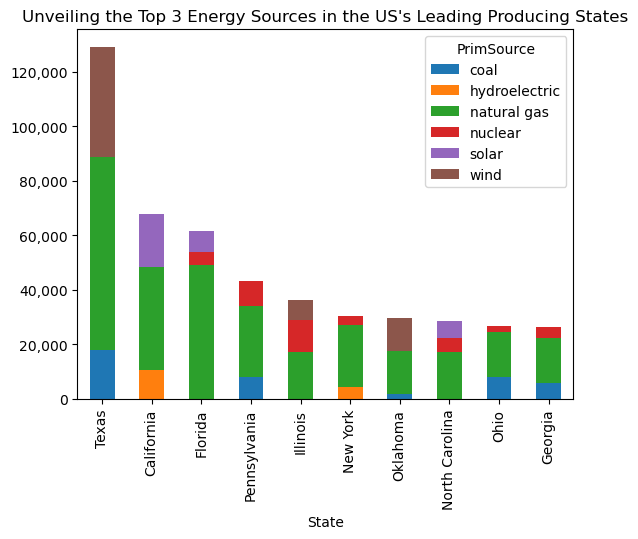

In [72]:
def VisTop10(df,column):
    df_VisTop10 = df[df['State'].isin(set(Top10States(df,column)['State']))]
    df_VisTop10 = df_VisTop10.groupby(['PrimSource','State'])[column].sum().unstack().T
    df_VisTop10.fillna(0,inplace=True)
    df_VisTop10['Total'] = df_VisTop10.sum(axis=1)
    return df_VisTop10.sort_values(by='Total').iloc[:,:-1][::-1]
    
def PlotVisTop10(df,column):
    ax = VisTop10(get_top3(column,ByState(df,column)),column).plot(kind='bar', stacked = True)
    plt.title("Unveiling the Top 3 Energy Sources in the US's Leading Producing States")
    ax.yaxis.set_major_formatter('{x:,.0f}')
    return plt.show()

PlotVisTop10(df,'Total_MW')

<Axes: xlabel='State'>

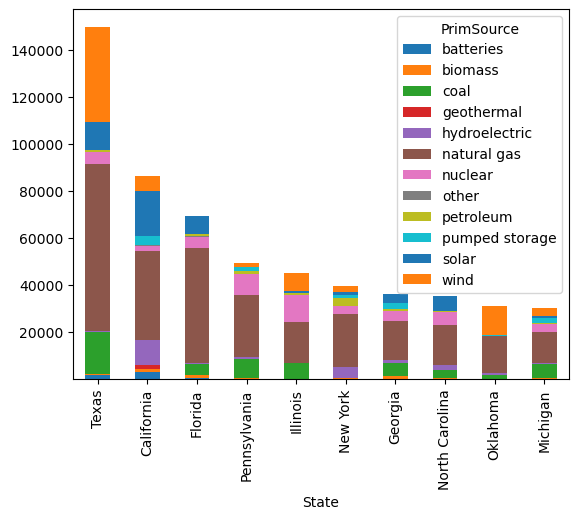

In [69]:
VisTop10(df,'Total_MW').plot(kind='bar',stacked=True)


In [66]:
df

,OBJECTID_1,OBJECTID,Plant_Code,Plant_Name,Utility_ID,Utility_Na,sector_nam,Street_Add,City,County,...,Solar_MW,Wind_MW,Other_MW,Source,Period,Longitude,Latitude,Install_MW_State,Total_MW_State,DifInstall_Total
0,1,13170,4068,Merrill,20860,Wisconsin Public Service Corp,Electric Utility,306 S Park St,Merrill,Lincoln,...,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-89.685000,45.178600,18146.5,16742.1,0.0
1,2,13171,4071,Potato Rapids,20860,Wisconsin Public Service Corp,Electric Utility,N4295 Potato Rapids Rd,Town of Porterfield,Marinette,...,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-87.758600,45.113600,18146.5,16742.1,0.0
2,3,13172,4072,Pulliam,20860,Wisconsin Public Service Corp,Electric Utility,1530 N Bylsby Av,Green Bay,Brown,...,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-88.008600,44.540000,18146.5,16742.1,12.0
3,4,13173,4074,Sandstone Rapids,20860,Wisconsin Public Service Corp,Electric Utility,N7633 Sandstone Lane,Town of Stephenson,Marinette,...,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-88.067800,45.233300,18146.5,16742.1,0.0
4,5,13174,4075,Tomahawk,20860,Wisconsin Public Service Corp,Electric Utility,W6080 Pride Pond Rd,Tomahawk,Lincoln,...,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-89.730600,45.441100,18146.5,16742.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,10604,23369,66127,Hewlett Packard Puerto Rico,65289,Hewlett Packard Puerto Rico B.V.,Commercial CHP,Highway 110 Km. 28 Bld. 1,Aguadilla,,...,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-67.109007,18.485901,6527.7,5981.0,0.0
12003,10605,23370,66134,Manati Medical Center,65294,Manati Medical Center,Commercial Non-CHP,638 Hernandez Carrion St.,Manati,San Juan,...,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-66.285500,18.260400,6527.7,5981.0,1.4
12004,10681,23446,66319,Lilly del Caribe PR01,65407,Lilly del Caribe,Industrial Non-CHP,400 Calle Fabril,Carolina,,...,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-65.963100,18.373600,6527.7,5981.0,0.0
12005,11139,22466,64613,Eaton Corp - Arecibo - Puerto Rico Hybrid,64227,Eaton Corporation - Arecibo - Puerto Rico,Industrial Non-CHP,Highway 2 Km 6.7,Arecibo,Arecibo,...,0.0,0.0,0.0,"EIA-860, EIA-860M and EIA-923",202305,-66.722048,18.470243,6527.7,5981.0,0.0


In [33]:
VisTop10(df,'Total_MW')

PrimSource,batteries,biomass,coal,geothermal,hydroelectric,natural gas,nuclear,other,petroleum,pumped storage,solar,wind
State,,,,,,,,,,,,
Texas,1698.6,364.1,17827.6,0.0,715.2,70901.4,4980.0,121.6,628.4,0.0,12255.8,40290.5
California,2943.2,1117.6,57.0,1866.8,10481.4,37891.6,2240.0,251.7,341.7,3658.8,19338.5,6175.4
Florida,523.8,1150.3,4898.4,0.0,43.5,49053.0,4920.1,312.9,951.1,0.0,7486.1,0.0
Pennsylvania,28.4,390.6,8094.5,0.0,899.6,26136.4,9093.2,105.9,1202.5,1544.4,217.2,1460.0
Illinois,75.8,55.8,6735.1,0.0,22.9,17282.0,11582.4,114.5,679.1,0.0,925.7,7511.8
New York,88.2,455.3,0.0,0.0,4562.9,22680.1,3341.3,20.0,3136.1,1408.8,1469.7,2527.5
Georgia,0.0,1157.5,5780.0,0.0,1295.4,16533.7,4061.0,0.0,1070.0,2587.0,3810.1,0.0
North Carolina,70.2,389.9,3564.0,0.0,1894.0,17253.8,5149.6,54.0,529.3,173.7,6224.0,208.0
Oklahoma,10.0,76.2,1789.0,0.0,843.7,15657.9,0.0,0.0,39.5,258.0,45.0,12145.7


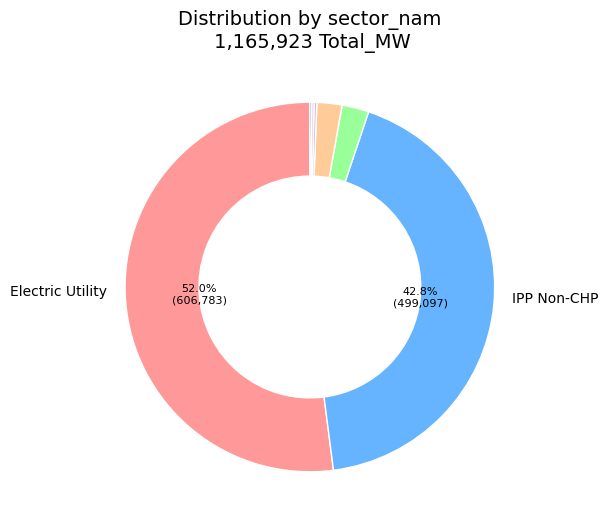

In [34]:
def df_statistics(df,attribute, x): #Attribute (column) to group by, and x is the variable to visualize
    return df.groupby(attribute)[x].sum().sort_values(ascending=False)

def pie_label_func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    if pct >= 4.2:  # Display label only if the percentage is greater than or equal to 3%
        return f'{pct:.1f}%\n({absolute:,})'
    else:
        return ''

def visualization_statistics(df,attribute,x):
    df = df_statistics(df,attribute,x) #check how to link this df to the variable df (since I'm trying to pass the variable to the other function)
    custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
    fig, ax = plt.subplots(figsize=(10,6))
    
    #list of labels to add to the pie chart if the percentage is greater than 3
    labels = [f'{label}\n' if pct >= 3 else '' for label, pct in zip(df.index, df/df.sum() * 100)] 
    
    wedges, texts, autotexts = ax.pie(df,
                                      labels=labels,
                                      autopct=lambda pct: pie_label_func(pct,df),
                                      startangle = 90,
                                      colors = custom_colors,
                                      wedgeprops = dict(width=0.4),
                                      textprops=dict(color='black'),
                                      labeldistance = 1.1)
    
    for wedge, text, autotext in zip(wedges, texts, autotexts):
        wedge.set_edgecolor('white')  # White edges for better visibility
        text.set_fontsize(10)        # Adjust text font size
        autotext.set_fontsize(8)
    
    plt.title(f"Distribution by {attribute}\n {format(int(df.sum()),',')} {x}", fontsize = 14)
    return plt.show()
                                      
                                      
## df_SectorNameStatistics = df.groupby('sector_nam')['Total_MW'].sum().sort_values(ascending=False)                                    
visualization_statistics(df,'sector_nam','Total_MW')
    

In [35]:
pd.DataFrame(df_statistics(df,'State','Total_MW')).reset_index()

,State,Total_MW
0,Texas,149783.2
1,California,86363.7
2,Florida,69339.2
3,Pennsylvania,49172.7
4,Illinois,44985.1
5,New York,39689.9
6,Georgia,36294.7
7,North Carolina,35510.5
8,Oklahoma,30865.0
9,Michigan,30391.4


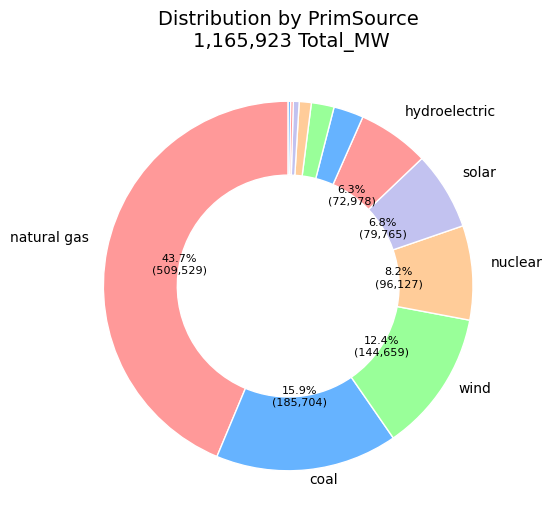

In [36]:

visualization_statistics(df,'PrimSource','Total_MW')

# Visualization KMeans

In [37]:
df_KMeans['State'] = df['State']
# df_KMeans[['Longitude', 'Latitude']] = df[['Longitude', 'Latitude']]
df_KMeans.head()

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude,Cluster,State
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,-89.6850,45.1786,2,4,0.000469,0.000584,0.111472,0.333333,0.363636,0.770696,0.510480,0,Wisconsin
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,-87.7586,45.1136,2,4,0.000235,0.000330,0.111472,0.333333,0.363636,0.788796,0.509261,0,Wisconsin
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,-88.0086,44.5400,2,5,0.021278,0.020066,0.111472,0.333333,0.454545,0.786447,0.498509,0,Wisconsin
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,-88.0678,45.2333,2,4,0.000821,0.000965,0.111472,0.333333,0.363636,0.785891,0.511505,0,Wisconsin
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,-89.7306,45.4411,2,4,0.000540,0.000660,0.111472,0.333333,0.363636,0.770268,0.515401,0,Wisconsin


# Visualization by cluster

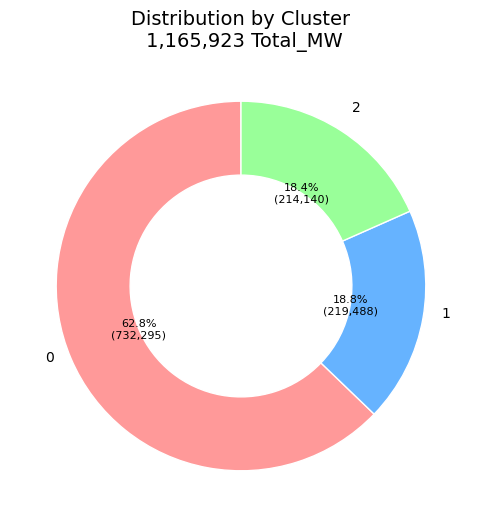

In [38]:
visualization_statistics(df_KMeans,'Cluster','Total_MW')


In [39]:
df0 = df_KMeans[df_KMeans['Cluster']==0]
df1 = df_KMeans[df_KMeans['Cluster']==1]
df2 = df_KMeans[df_KMeans['Cluster']==2]

# Visualization by source (each cluster)

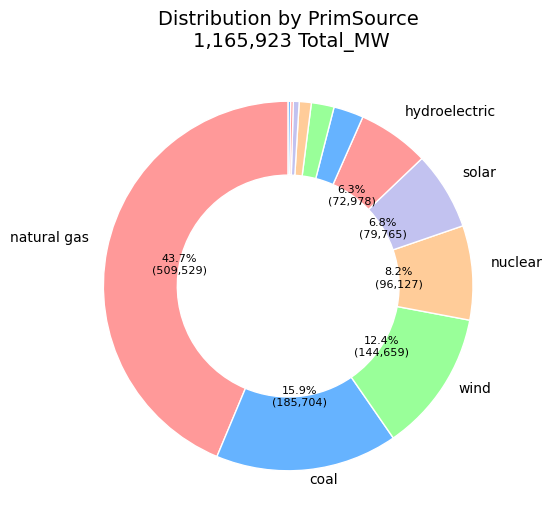

In [40]:
visualization_statistics(df,'PrimSource','Total_MW')

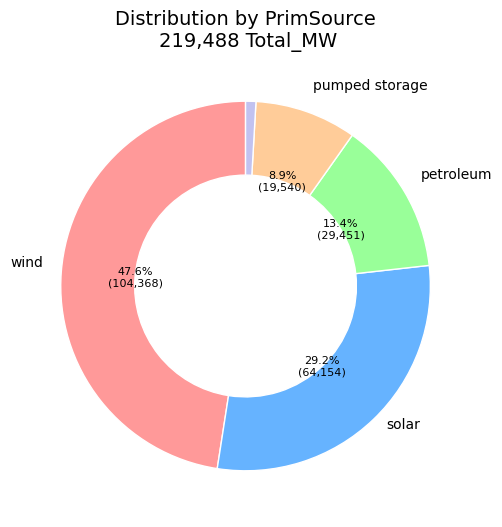

In [41]:
visualization_statistics(df1,'PrimSource','Total_MW')

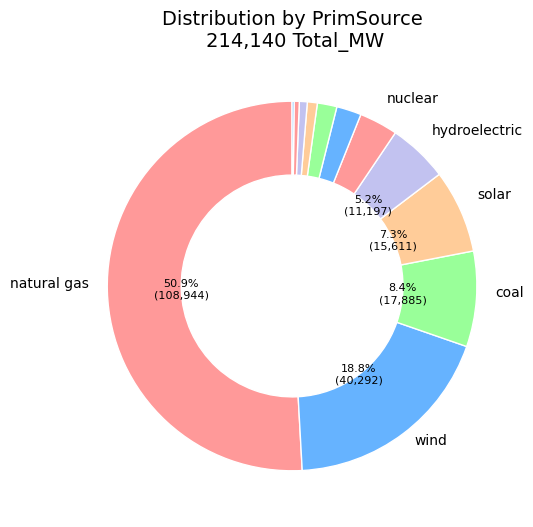

In [42]:
visualization_statistics(df2,'PrimSource','Total_MW')

# Visualization by State (each cluster)

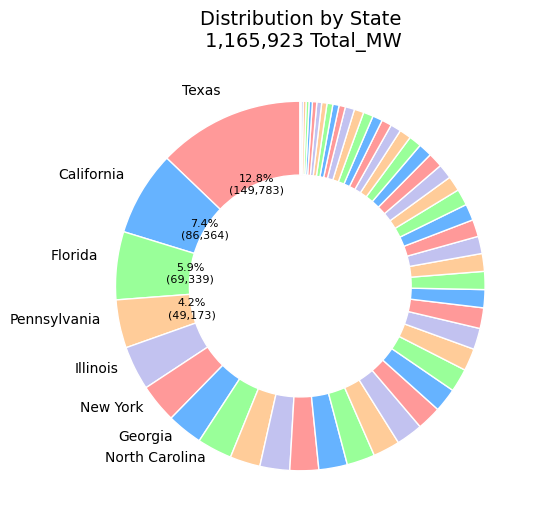

In [43]:
visualization_statistics(df,'State','Total_MW')

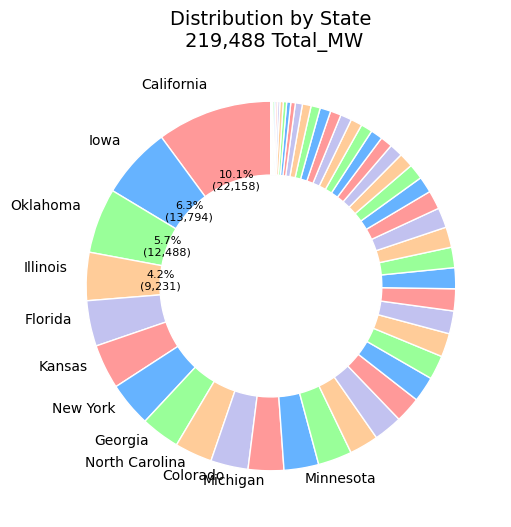

In [44]:
visualization_statistics(df1,'State','Total_MW')

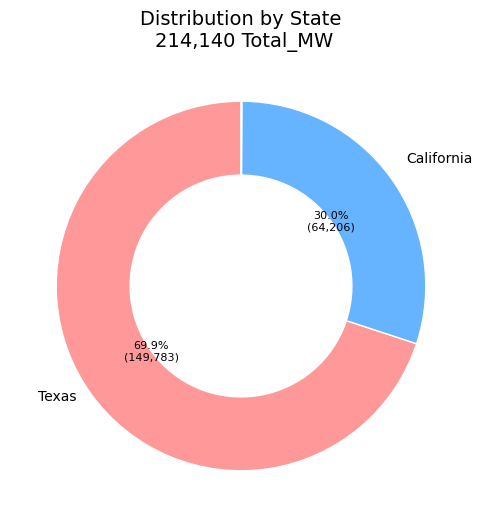

In [45]:
visualization_statistics(df2,'State','Total_MW')

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


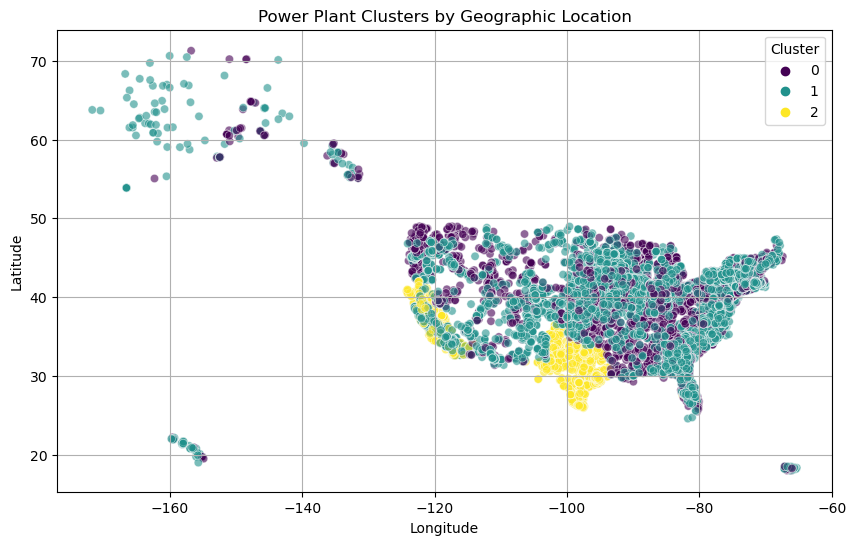

C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crist\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


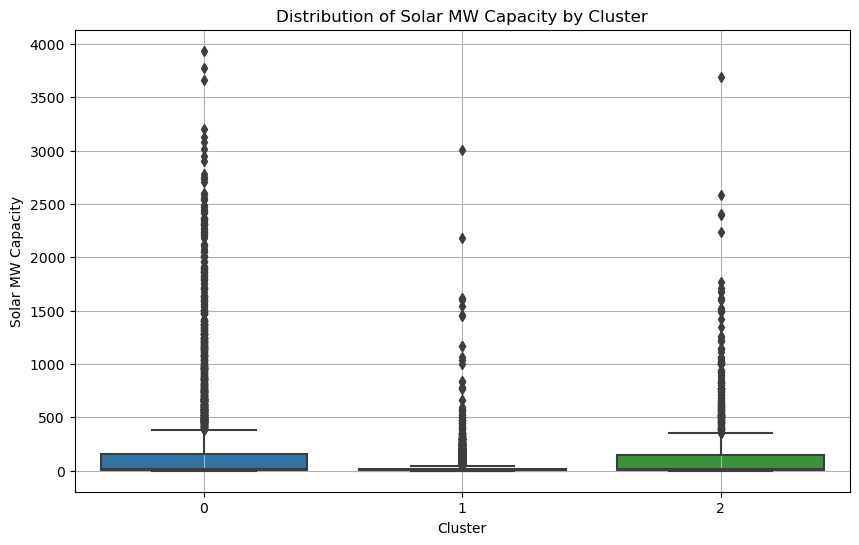

In [46]:
# Visualizing the clusters based on two dimensions: Longitude and Latitude to see geographical patterns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_KMeans, x='Longitude', y='Latitude', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Power Plant Clusters by Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Additionally, visualize the distribution of a few key features (e.g., Solar_MW, Nuclear_MW) across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Total_MW', data=df_KMeans)
plt.title('Distribution of Solar MW Capacity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Solar MW Capacity')
plt.grid(True)
plt.show()

# Top 10 energy contributors

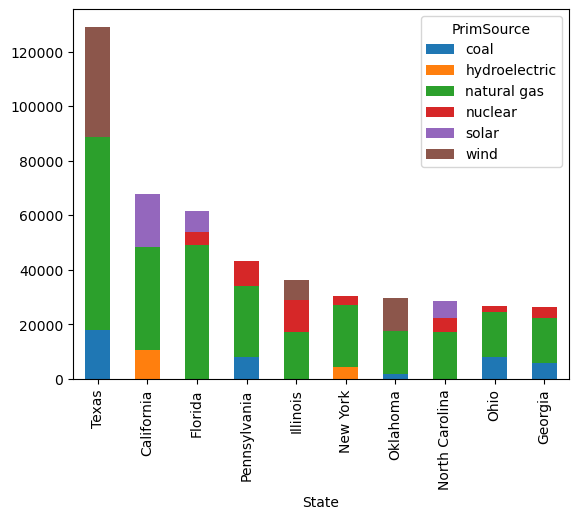

In [47]:
PlotVisTop10(df,'Total_MW')

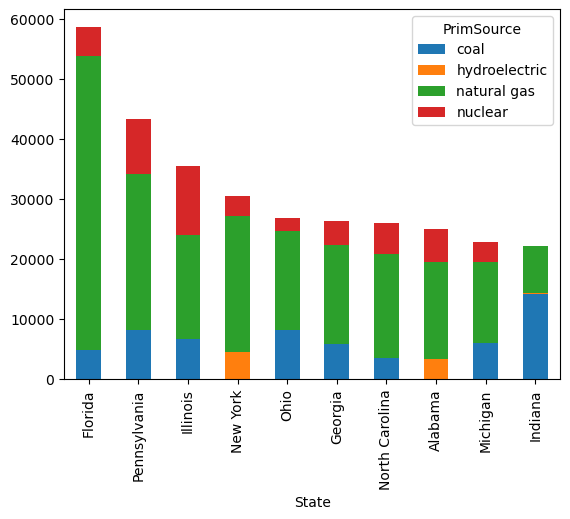

In [48]:
PlotVisTop10(df0,'Total_MW')

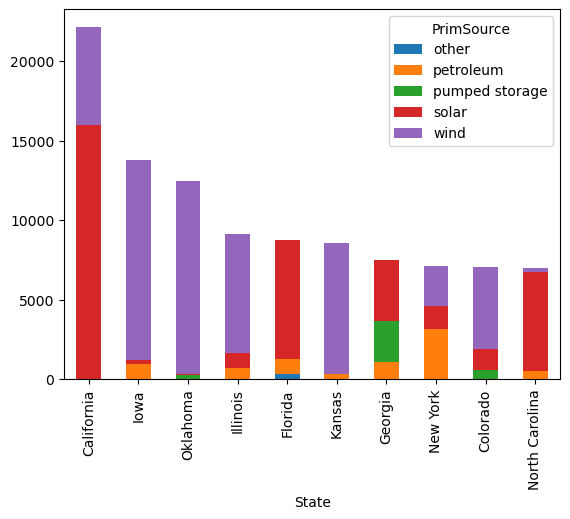

In [49]:
PlotVisTop10(df1,'Total_MW')

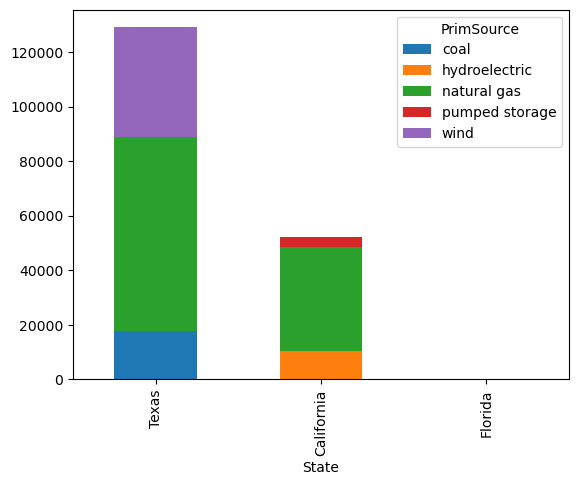

In [50]:
PlotVisTop10(df2,'Total_MW')

In [51]:
df0

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude,Cluster,State
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,-89.685000,45.178600,2,4,0.000469,0.000584,0.111472,0.333333,0.363636,0.770696,0.510480,0,Wisconsin
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,-87.758600,45.113600,2,4,0.000235,0.000330,0.111472,0.333333,0.363636,0.788796,0.509261,0,Wisconsin
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,-88.008600,44.540000,2,5,0.021278,0.020066,0.111472,0.333333,0.454545,0.786447,0.498509,0,Wisconsin
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,-88.067800,45.233300,2,4,0.000821,0.000965,0.111472,0.333333,0.363636,0.785891,0.511505,0,Wisconsin
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,-89.730600,45.441100,2,4,0.000540,0.000660,0.111472,0.333333,0.363636,0.770268,0.515401,0,Wisconsin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11987,Electric Utility,hydroelectric,5.0,5.0,6527.7,5981.0,-65.794000,18.268000,2,4,0.001103,0.001270,0.039603,0.333333,0.363636,0.995167,0.006015,0,Puerto Rico
11995,Industrial CHP,natural gas,3.2,3.2,6527.7,5981.0,-65.882470,18.385370,5,5,0.000680,0.000813,0.039603,0.833333,0.454545,0.994335,0.008216,0,Puerto Rico
11996,Industrial Non-CHP,natural gas,30.6,30.6,6527.7,5981.0,-66.566767,18.432669,6,5,0.007108,0.007772,0.039603,1.000000,0.454545,0.987906,0.009102,0,Puerto Rico
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0,-67.109007,18.485901,0,5,0.001337,0.001524,0.039603,0.000000,0.454545,0.982811,0.010100,0,Puerto Rico


In [52]:
# def DifInstall_Total(df):
df['DifInstall_Total'] = df['Install_MW'] - df['Total_MW']
#     return df

def StatisticsVisualization(df):
    return df.groupby('PrimSource')['DifInstall_Total'].sum().sort_values(ascending=False)#[:-1]
StatisticsVisualization(df)

PrimSource
natural gas       65971.1
coal              16420.7
nuclear            4663.9
petroleum          4240.5
biomass            1644.8
geothermal         1328.8
wind                830.4
solar               366.8
other               331.9
hydroelectric       176.0
batteries            12.3
pumped storage    -1073.9
Name: DifInstall_Total, dtype: float64

In [53]:
StatisticsVisualization(df)

PrimSource
natural gas       65971.1
coal              16420.7
nuclear            4663.9
petroleum          4240.5
biomass            1644.8
geothermal         1328.8
wind                830.4
solar               366.8
other               331.9
hydroelectric       176.0
batteries            12.3
pumped storage    -1073.9
Name: DifInstall_Total, dtype: float64

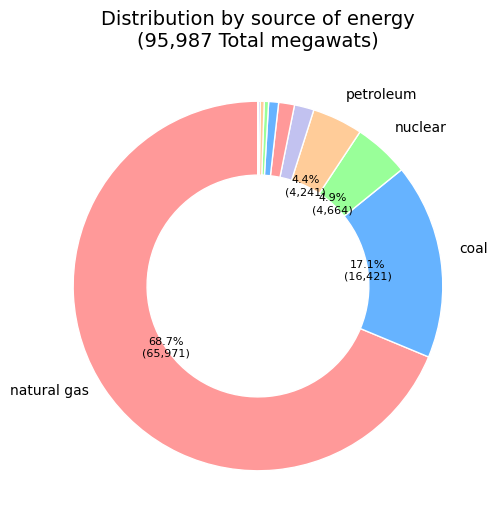

In [54]:


df_PrimSourceStatistics =StatisticsVisualization(df)[:-1]


custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a figure with a subplot for the pie chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define a function to customize label display
def pie_label_func(pct, allvalues):
    absolute = int(round(pct / 100. * sum(allvalues)))
    if pct >= 4.2:  # Display label only if the percentage is greater than or equal to 3%
        return f'{pct:.1f}%\n({absolute:,})'
    else:
        return ''

# Plot the pie chart with adjusted autopct label placement
wedges, texts, autotexts = ax.pie(
    df_PrimSourceStatistics,
    labels=[f'{label}\n' if pct >= 3 else '' for label, pct in zip(df_PrimSourceStatistics.index, df_PrimSourceStatistics / df_PrimSourceStatistics.sum() * 100)],
    autopct=lambda pct: pie_label_func(pct, df_PrimSourceStatistics),
    startangle=90,
    colors=custom_colors,
    wedgeprops=dict(width=0.4),
    textprops=dict(color="black"),
    labeldistance=1.1,  # Adjust label distance from the center to avoid overlapping
)

# Customize the appearance of the wedges and text
for wedge, text, autotext in zip(wedges, texts, autotexts):
    wedge.set_edgecolor('white')  # White edges for better visibility
    text.set_fontsize(10)        # Adjust text font size
    autotext.set_fontsize(8)     # Adjust autopct text font size

# Add a title
plt.title(f'Distribution by source of energy\n({format(int(df_PrimSourceStatistics.sum()), ",")} Total megawats)', fontsize=14)

# Save the pie chart as an image
# plt.savefig('DomPieChart_DistOPTRByDIV.png', bbox_inches='tight')

# Show the plot
plt.show()


In [55]:
df.columns

Index(['OBJECTID_1', 'OBJECTID', 'Plant_Code', 'Plant_Name', 'Utility_ID',
       'Utility_Na', 'sector_nam', 'Street_Add', 'City', 'County', 'State',
       'Zip', 'PrimSource', 'source_des', 'tech_desc', 'Install_MW',
       'Total_MW', 'Bat_MW', 'Bio_MW', 'Coal_MW', 'Geo_MW', 'Hydro_MW',
       'HydroPS_MW', 'NG_MW', 'Nuclear_MW', 'Crude_MW', 'Solar_MW', 'Wind_MW',
       'Other_MW', 'Source', 'Period', 'Longitude', 'Latitude',
       'Install_MW_State', 'Total_MW_State', 'DifInstall_Total'],
      dtype='object')

# Number of powerPlants

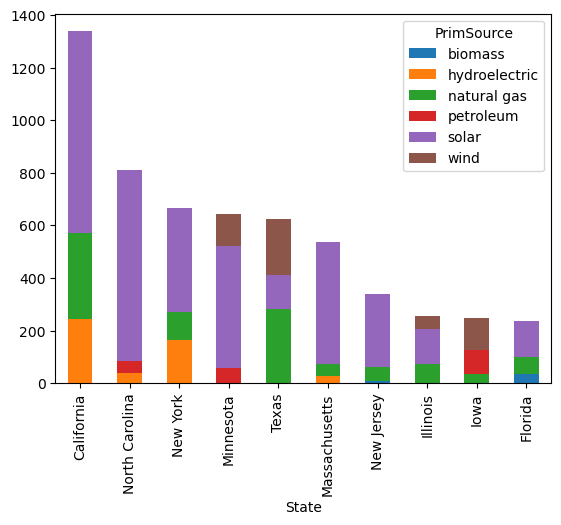

In [56]:
df_numberOfPlants = df.groupby(['State','PrimSource'])['PrimSource'].count().to_frame(name='Count').reset_index()
df_numberOfPlants#.fillna(0,inplace=True)

PlotVisTop10(df_numberOfPlants,'Count')

In [61]:
df_numberOfPlants

,State,PrimSource,Count
0,Alabama,biomass,13
1,Alabama,coal,1
2,Alabama,hydroelectric,23
3,Alabama,natural gas,24
4,Alabama,nuclear,2
...,...,...,...
436,Wyoming,natural gas,8
437,Wyoming,other,3
438,Wyoming,petroleum,2
439,Wyoming,solar,1


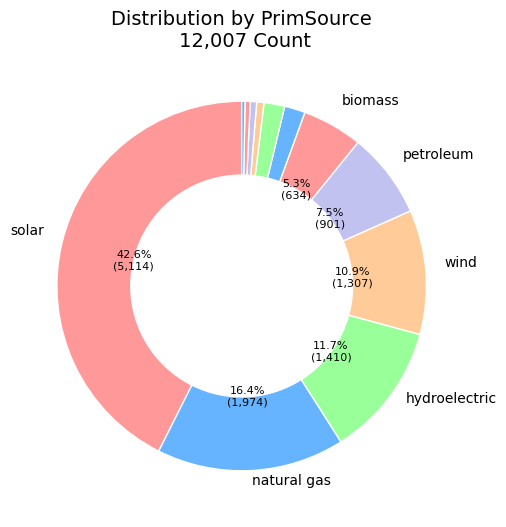

In [63]:
visualization_statistics(df_numberOfPlants,'PrimSource','Count')

In [57]:
df_KMeans

,sector_nam,PrimSource,Install_MW,Total_MW,Install_MW_State,Total_MW_State,Longitude,Latitude,Sector_encoded,PimSource_encoded,SInstall_MW,STotal_MW,STotal_MW_State,SSector_encoded,SPimSource_encoded,SLongitude,SLatitude,Cluster,State
0,Electric Utility,hydroelectric,2.3,2.3,18146.5,16742.1,-89.685000,45.178600,2,4,0.000469,0.000584,0.111472,0.333333,0.363636,0.770696,0.510480,0,Wisconsin
1,Electric Utility,hydroelectric,1.3,1.3,18146.5,16742.1,-87.758600,45.113600,2,4,0.000235,0.000330,0.111472,0.333333,0.363636,0.788796,0.509261,0,Wisconsin
2,Electric Utility,natural gas,91.0,79.0,18146.5,16742.1,-88.008600,44.540000,2,5,0.021278,0.020066,0.111472,0.333333,0.454545,0.786447,0.498509,0,Wisconsin
3,Electric Utility,hydroelectric,3.8,3.8,18146.5,16742.1,-88.067800,45.233300,2,4,0.000821,0.000965,0.111472,0.333333,0.363636,0.785891,0.511505,0,Wisconsin
4,Electric Utility,hydroelectric,2.6,2.6,18146.5,16742.1,-89.730600,45.441100,2,4,0.000540,0.000660,0.111472,0.333333,0.363636,0.770268,0.515401,0,Wisconsin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,Commercial CHP,natural gas,6.0,6.0,6527.7,5981.0,-67.109007,18.485901,0,5,0.001337,0.001524,0.039603,0.000000,0.454545,0.982811,0.010100,0,Puerto Rico
12003,Commercial Non-CHP,petroleum,3.8,2.4,6527.7,5981.0,-66.285500,18.260400,1,8,0.000821,0.000610,0.039603,0.166667,0.727273,0.990549,0.005873,1,Puerto Rico
12004,Industrial Non-CHP,petroleum,27.6,27.6,6527.7,5981.0,-65.963100,18.373600,6,8,0.006404,0.007010,0.039603,1.000000,0.727273,0.993578,0.007995,1,Puerto Rico
12005,Industrial Non-CHP,petroleum,8.2,8.2,6527.7,5981.0,-66.722048,18.470243,6,8,0.001853,0.002083,0.039603,1.000000,0.727273,0.986447,0.009807,1,Puerto Rico


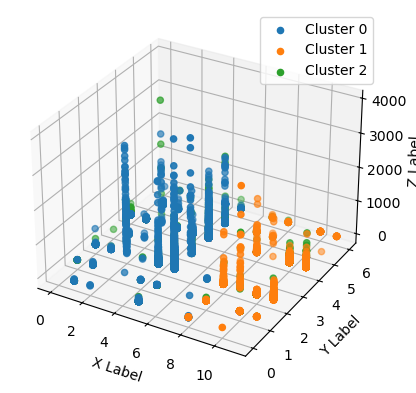

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure with 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points for each cluster separately
clusters = df_KMeans['Cluster'].unique()
for cluster in clusters:
    cluster_data = df_KMeans[df_KMeans['Cluster'] == cluster]
    ax.scatter(cluster_data['PimSource_encoded'], cluster_data['Sector_encoded'], cluster_data['Total_MW'], label=f'Cluster {cluster}')

# Set labels for the axes
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Add a legend
ax.legend()

plt.show()


In [59]:
data = pd.DataFrame(df_statistics(df,'State','Total_MW')).reset_index()
data

,State,Total_MW
0,Texas,149783.2
1,California,86363.7
2,Florida,69339.2
3,Pennsylvania,49172.7
4,Illinois,44985.1
5,New York,39689.9
6,Georgia,36294.7
7,North Carolina,35510.5
8,Oklahoma,30865.0
9,Michigan,30391.4


In [60]:
us_states = us_states.rename(columns={'name': 'State'})
us_states

NameError: name 'us_states' is not defined

In [ ]:
# Load US States dataset
us_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

usa = us_states[us_states.name == "United States of America"]
# We'll use 'name' column as the key to merge data
# us_states = us_states.rename(columns={'name': 'State'})

# Sample data with state names and numeric values
# data = {'State': ['California', 'Texas', 'New York', 'Florida', 'Illinois'],
#         'Value': [10, 20, 15, 25, 30]}
data#_df = pd.DataFrame(data)

# Merge state boundaries with sample data
merged_data = usa.merge(data, on='State')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(column='Total_MW', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Sample Data Visualization by State')
ax.axis('off')
plt.show()